<a href="https://colab.research.google.com/github/Schumau/DS/blob/main/ProyectoDSParteII%2BSchuch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio de clientes bancarios**

## Introducción

En este análisis inicial busco comprender las características, ocupacionales y la relación de los clientes con la institución financiera. Este estudio utiliza un conjunto de datos proporcionado por un banco para explorar patrones clave de los clientes.
El análisis también explora la proporción de clientes con hipotecas activas y aquellos con deudas, identificando factores asociados al incumplimiento de pagos.

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

Con frecuencia, era necesario contactar varias veces al mismo cliente para determinar si aceptaría o no el producto ofrecido, en este caso, un depósito bancario a plazo.

## Hipótesis

Hipótesis 1: los clientes jóvenes (menores de 30 años) tienen menos probabilidad de aceptar un depósito bancario a plazo en comparación con los clientes mayores.

Hipótesis 2: la probabilidad de éxito aumenta con cada contacto adicional realizado con un cliente.

Hipótesis 3: los clientes con préstamos personales activos tienen menos probabilidades de aceptar un depósito bancario.

Hipótesis 4: los clientes solteros tienen menos interés en los depósitos bancarios a plazo en comparación con los casados.

Hipótesis 5: las personas con un mayor nivel educativo tienen una mayor tasa de aceptación del producto.

##Inicio del análisis

**1** Importamos las librearías que vamos a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

**2** Importamos el archivo csv que vamos a analizar desde mi drive.

In [3]:
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv'

if os.path.exists(csv_file_path):
    print("El archivo CSV existe.")
else:
    print("El archivo CSV no se encuentra en la ruta especificada.")

try:
    df = pd.read_csv(csv_file_path)
    print('Archivo cargado con éxito.')
    print('Dimensiones del DataFrame:', df.shape)
except Exception as e:
        print(f"Ocurrió un error al cargar el archivo CSV: {e}")

El archivo CSV existe.
Archivo cargado con éxito.
Dimensiones del DataFrame: (41188, 1)


**3** Cargamos el archivo con separación por " ; " ya que no separa las columnas y lee solo 1 con todos los datos

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Ahora nos da los mismos datos pero con 21 columnas

Nos aseguramos de esto:

In [9]:
df.shape

(41188, 21)

**4** Buscamos conocer la info del archivo

In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**5** Debemos eliminar los datos que no brinden información extra como los duplicados, revisar datos faltantes, tomar decisiones sobre qué hacer con los valores missing o los valores nulls (eliminarlos o valorarlos), ver si hay columnas que no aportan información relevante y enlentecen nuestro código..


In [10]:
df.duplicated().sum()

12

Vemos que hay 12 duplicados, ahora veamos cuáles son

In [11]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

Así quedaría el archivo libre de duplicados

In [12]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Seguimos, ahora buscamos saber si hay nulos

In [13]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


No hay nulos, asique procedemos a eliminar estos duplicados

In [14]:
df1 = df.drop_duplicates(subset=None,
                          keep='first',
                          inplace=False,
                          ignore_index=False)
df1.shape

(41176, 21)

**df1** va a ser nuestra dataframe a partir de este punto.

**Relacionadas a los clientes**

Las primeras 7 columnas son relaciones directas al cliente asique trabajaré sobre esas inicialmente.

**['age', 'job', 'maritel', 'education', 'default', 'housing', 'loan']**

In [15]:
bank_client = df1.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


Buscamos los valores únicos en estas variables

In [19]:
print('Age:\n', bank_client['age'].unique())
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Age:
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


Vemos que aparece un valor 'Unknown' en el dataset, asique vamos a ver en qué proporción está y si es considerado valor faltante.

In [20]:
print('Hay un ' + str((df['job']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna job')
print('Hay un ' + str((df['marital']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna marital')
print('Hay un ' + str((df['education']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna education')
print('Hay un ' + str((df['default']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna default')
print('Hay un ' + str((df['housing']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna housing')
print('Hay un ' + str((df['loan']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna loan')

Hay un 0.8012042342429834 % de registros Unknow en la columna job
Hay un 0.1942313295134505 % de registros Unknow en la columna marital
Hay un 4.202680392347285 % de registros Unknow en la columna education
Hay un 20.87258424783918 % de registros Unknow en la columna default
Hay un 2.40361270272895 % de registros Unknow en la columna housing
Hay un 2.40361270272895 % de registros Unknow en la columna loan


Viendo el resultado, no eliminamos las filas que tienen valores 'Unknow' porque los toma como un valor mas para la variable y no como un valor faltante. Aclaro que no se consideró la variable 'age' ya que se aprecia en el anterior que no aparecía ningún valor 'Unknown'.

#**Edad**

Vamos a ver el rango de edades que hay entre los clientes, el máximo y el mínimo.

In [22]:
print('Edad mínima: ', bank_client['age'].min())
print('Edad máxima: ', bank_client['age'].max())

Edad mínima:  17
Edad máxima:  98


Gráfico de clientes por edades

Pregunta: ¿Cuál es la edad más común entre los clientes?

<ipython-input-24-18b476be28b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'age', data = bank_client, palette='viridis_r')


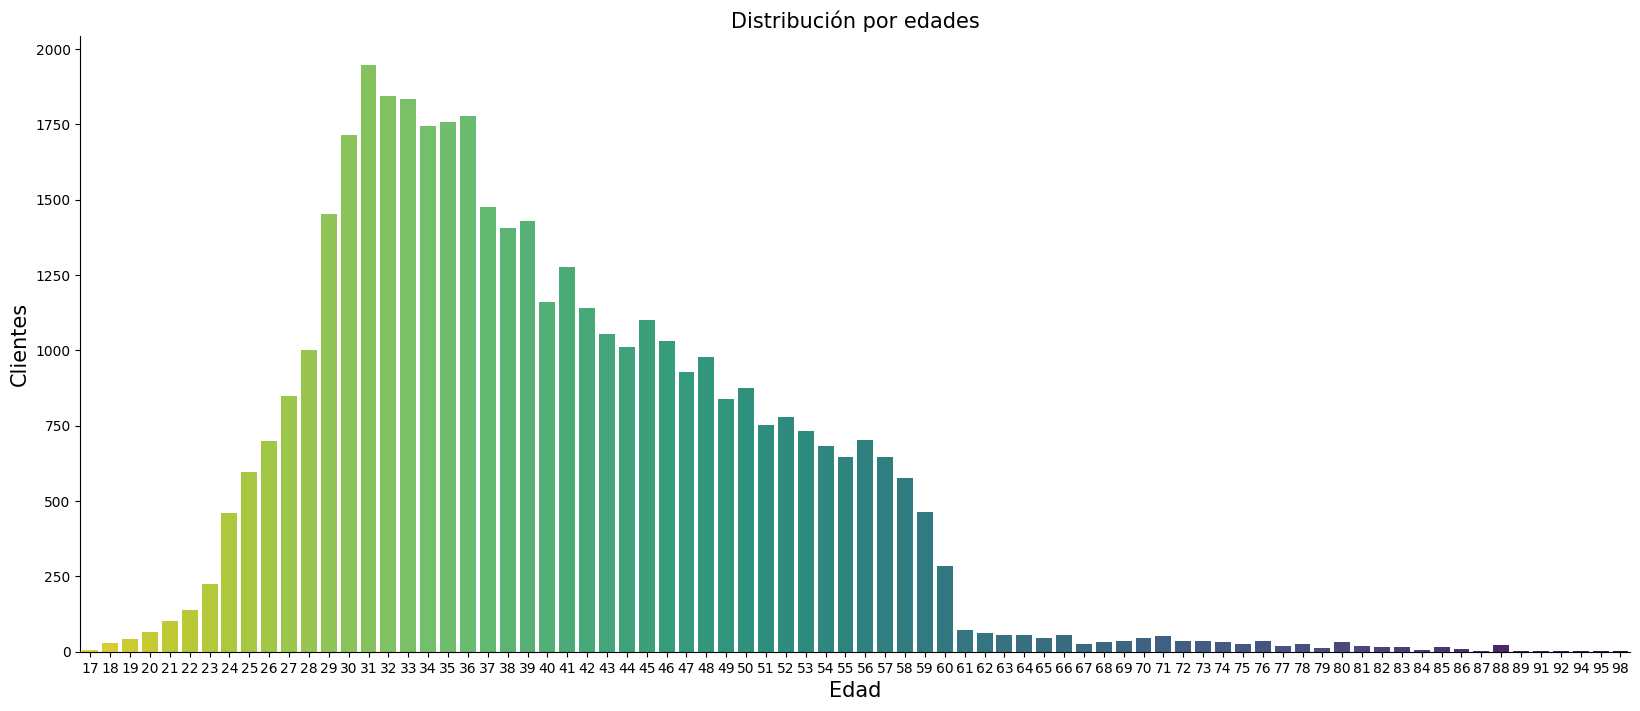

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client, palette='viridis_r')
ax.set_xlabel('Edad', fontsize=15)
ax.set_ylabel('Clientes', fontsize=15)
ax.set_title('Distribución por edades', fontsize=15)
sns.despine()

Observamos que la mayor parte de clientes es de 31 años.

Pregunta: ¿Cuál es el rango de edades relevantes, y cuáles son los valores atípicos u outliers?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


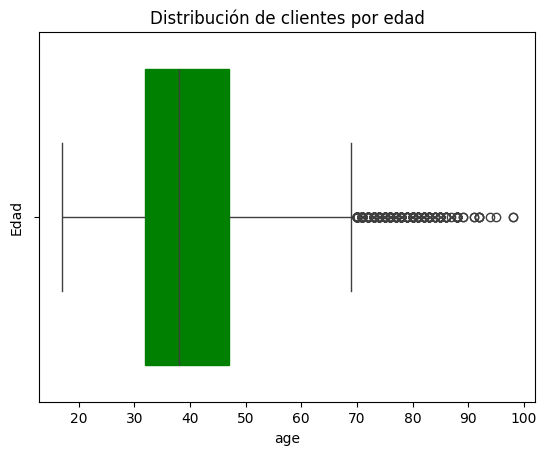

In [60]:
sns.boxplot(x='age', data=bank_client, orient='h', boxprops=dict(facecolor='black', color='green'))
plt.title('Distribución de clientes por edad')
plt.ylabel('Clientes')
plt.ylabel('Edad')
plt.show()


Observamos que el rango de edades va desde:

el cuartil 1 = 32

hasta cuartil 3= 47

siendo la mediana= 39.5

Observando el gráfico de caja vemos varios outliers, asique vamos a delimitar a partir de qué valor los consideramos atípicos

Vamos a evaluar el umbral superior como **US= Q3 + 1,5 * (Q3-Q1)**

Así sabemos cuales son considerados outliers.

In [61]:
Q1 = bank_client['age'].quantile(q = 0.25)
Q3 = bank_client['age'].quantile(q = 0.75)

umbral_superior = Q3 + 1.5 * (Q3 - Q1)
print('Cuartil 1=', Q1)
print('Cuartil 3=', Q3)
print('Las edades por encima de: ', umbral_superior, 'son outliers')

Cuartil 1= 32.0
Cuartil 3= 47.0
Las edades por encima de:  69.5 son outliers


Pregunta: ¿Qué valor representan estos outliers?

In [62]:
print('Cantidad de outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Cantidad de clientes: ', len(bank_client))
#Outliers in %
print('Porcentaje de outliers:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Cantidad de outliers:  468
Cantidad de clientes:  41176
Porcentaje de outliers: 1.14 %


Podemos ver que es muy baja la cantidad, por debajo de 1.2%

#**Ocupaciones**

Vamos a analizar a acerca de los trabajos de los clientes

Pregunta: ¿Cuáles son los trabajos de los clientes contactados?

<ipython-input-65-270edafd482e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'job', data = bank_client, palette='pastel')


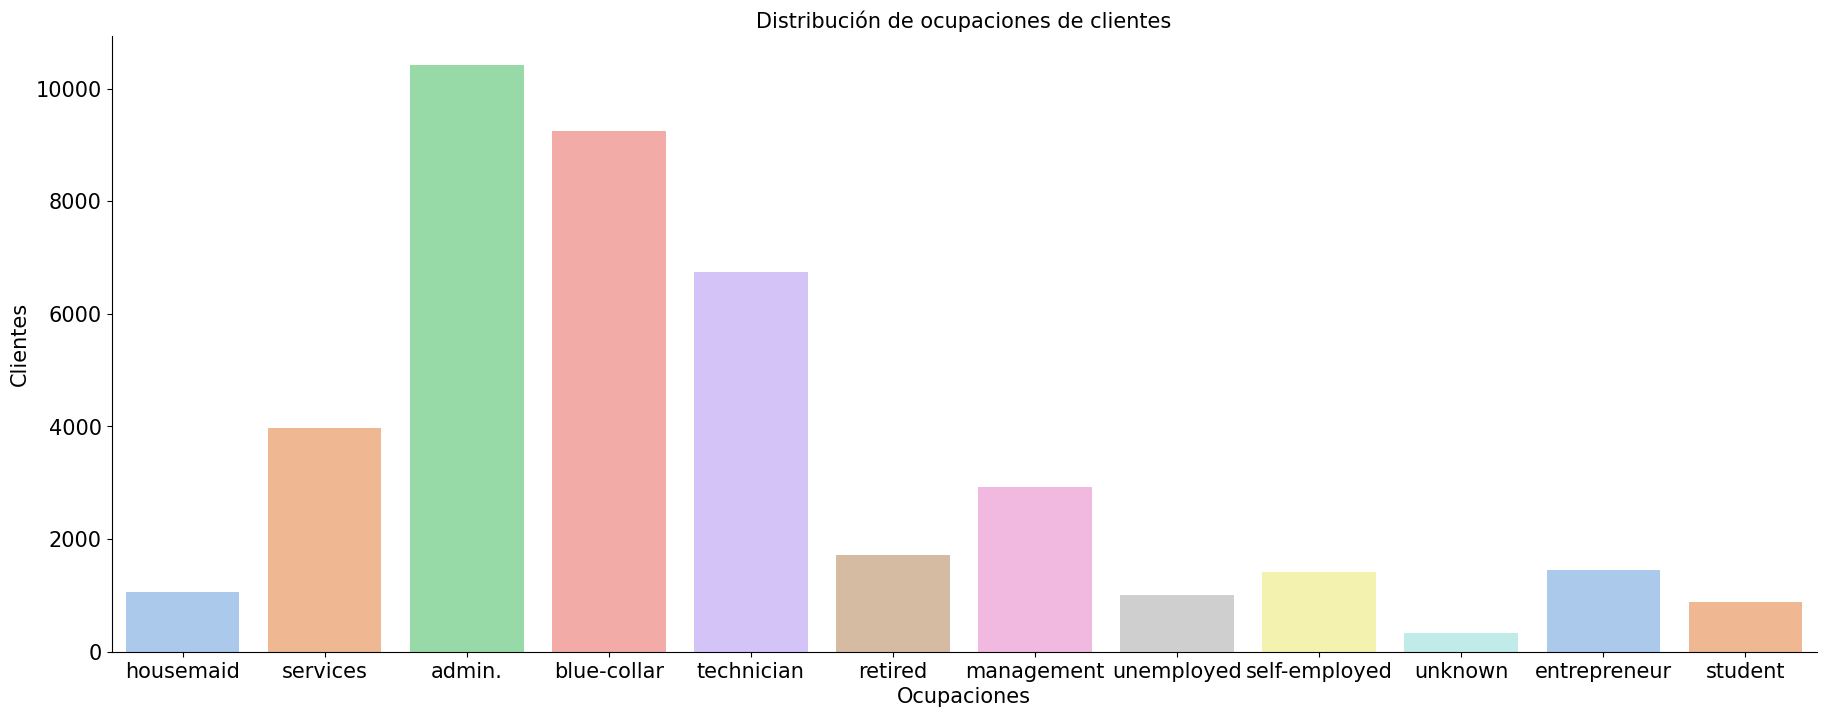

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)
sns.countplot(x = 'job', data = bank_client, palette='pastel')
ax.set_xlabel('Ocupaciones', fontsize=15)
ax.set_ylabel('Clientes', fontsize=15)
ax.set_title('Distribución de ocupaciones de clientes', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Podríamos ver hay 12 categorías, y de estas resaltan 'admin', 'blue-collar' y 'technician' como las que mayor cantidad de clientes tienen.

#**Estado civil**

Pregunta: ¿Cuál es la distribución de estado civil de los clientes?

<ipython-input-67-2b0630e52bd8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'marital', data = bank_client, palette='coolwarm')


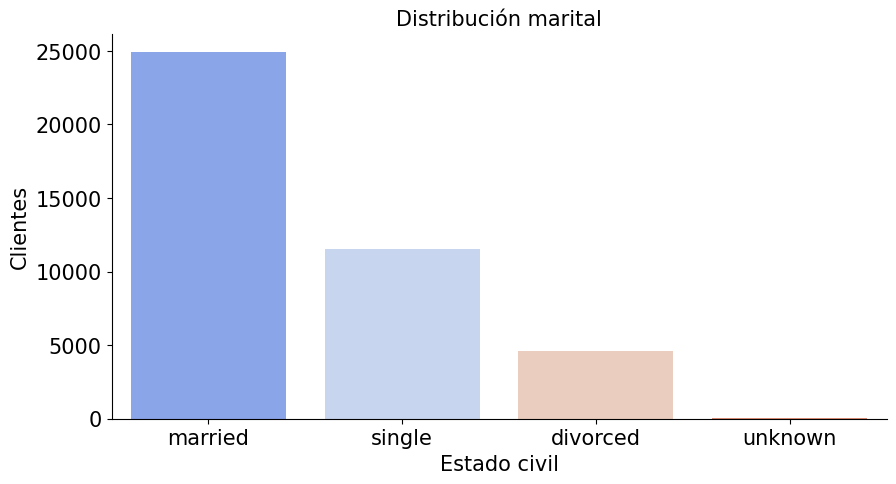

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client, palette='coolwarm')
ax.set_xlabel('Estado civil', fontsize=15)
ax.set_ylabel('Clientes', fontsize=15)
ax.set_title('Distribución marital', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Vemos que la mayor parte son gente casada, siguen los solteros con menos de la mitad al anterior, continuan los divorciados y finalmente los que no tenemos datos acerca de sus estados que son la minoría.

#**Educación**

Pregunta: ¿Cuál es el nivel de estudios que tienen los clientes?

<ipython-input-69-2ff7d7a0dec8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'education', data = bank_client, palette='deep')


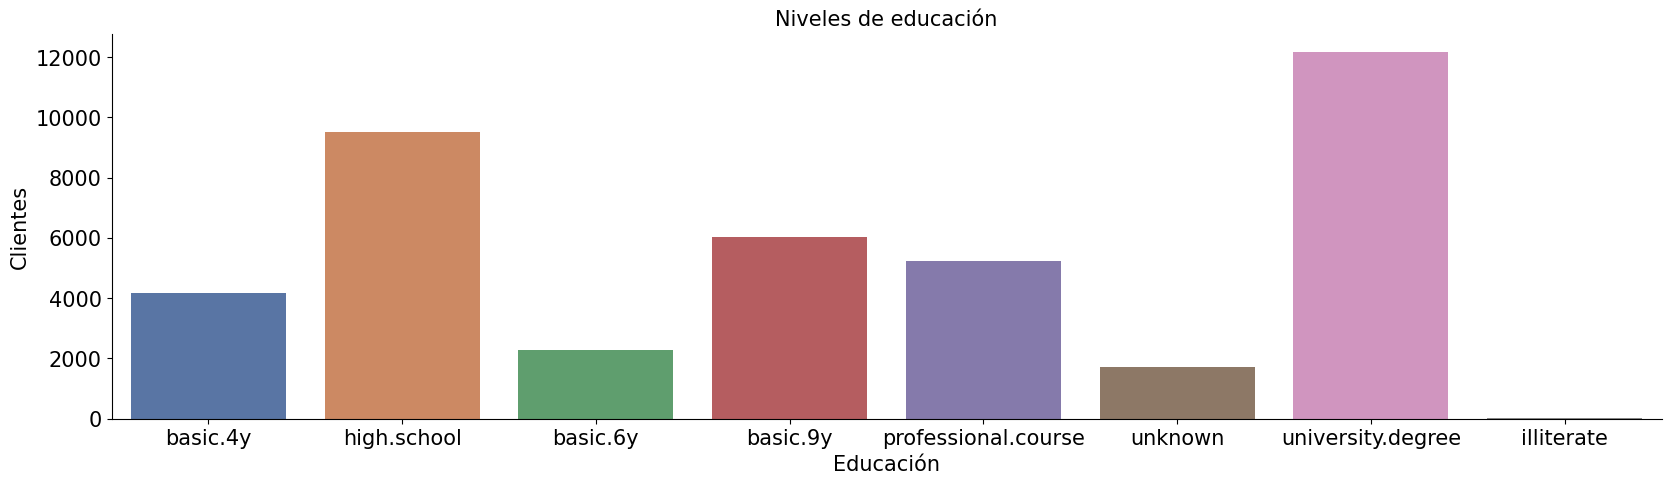

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client, palette='deep')
ax.set_xlabel('Educación', fontsize=15)
ax.set_ylabel('Clientes', fontsize=15)
ax.set_title('Niveles de educación', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#**Relación con el banco**

Analisamos la situación que tiene con la entidad:

Pregunta: ¿Cuál es el estado de los clientes a cerca de su relación con los productos del banco?

Para responder esta pregunta vamos a partir de las 3 categorías que hay: 'loan', 'housing' y 'default'.

Vamos a analizar de a una para ver sus estadísticas.

##**loan**

Comenzamos con los préstamos personales.

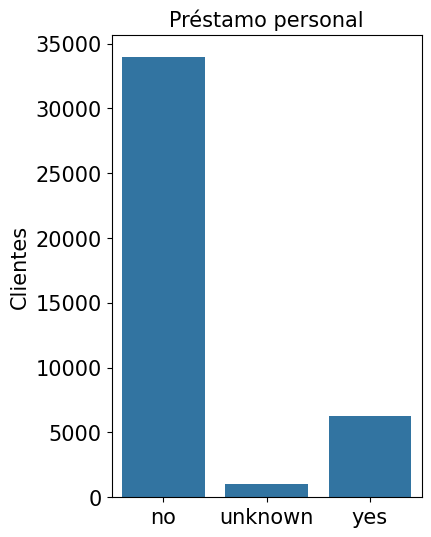

In [79]:
plt.figure(figsize=(4, 6))
sns.countplot(x = 'loan', data = bank_client, order = ['no', 'unknown', 'yes'])
plt.title('Préstamo personal', fontsize=15)
plt.xlabel('')
plt.ylabel('Clientes', fontsize=15)
plt.tick_params(labelsize=15)

In [84]:
print('Préstamo personal:\n Clientes sin préstamo personal:', bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Clientes que desconocemos si tienen préstamo personal:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Clientes con préstamo personal:', bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Préstamo personal:
 Clientes sin préstamo personal: 33938 
 Clientes que desconocemos si tienen préstamo personal: 990 
 Clientes con préstamo personal: 6248


##**housing**

Continuamos con los préstamos hipotecarios.

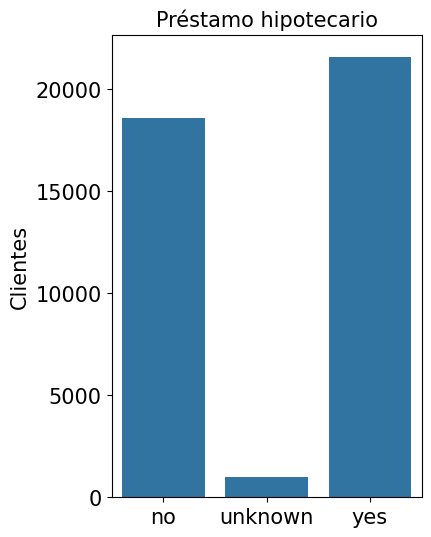

In [80]:
plt.figure(figsize=(4, 6))
sns.countplot(x = 'housing', data = bank_client, order = ['no', 'unknown', 'yes'])
plt.title('Préstamo hipotecario', fontsize=15)
plt.xlabel('')
plt.ylabel('Clientes', fontsize=15)
plt.tick_params(labelsize=15)

In [83]:
print('Préstamo hipotecario:\n Clientes sin préstamo hipotecario:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Clientes que desconocemos si tienen préstamo hipotecario:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Clientes con préstamo hipotecario:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Préstamo hipotecario:
 Clientes sin préstamo hipotecario: 18615 
 Clientes que desconocemos si tienen préstamo hipotecario: 990 
 Clientes con préstamo hipotecario: 21571


##**default**

Finalizamos esta parte analizando si los clientes han incumplido algún pago.

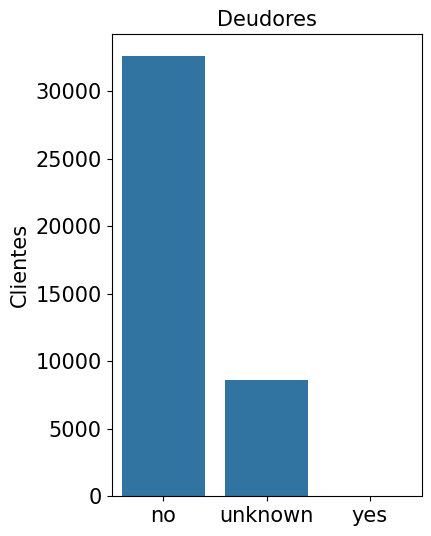

In [81]:
plt.figure(figsize=(4, 6))
sns.countplot(x = 'default', data = bank_client, order = ['no', 'unknown', 'yes'])
plt.title('Deudores', fontsize=15)
plt.xlabel('')
plt.ylabel('Clientes', fontsize=15)
plt.tick_params(labelsize=15)

In [82]:
print('Default:\n Clientes sin crédito en default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Clientes que desconocemos si tienen crédito en default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Clientes con crédito en default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 Clientes sin crédito en default: 32577 
 Clientes que desconocemos si tienen crédito en default: 8596 
 Clientes con crédito en default: 3
